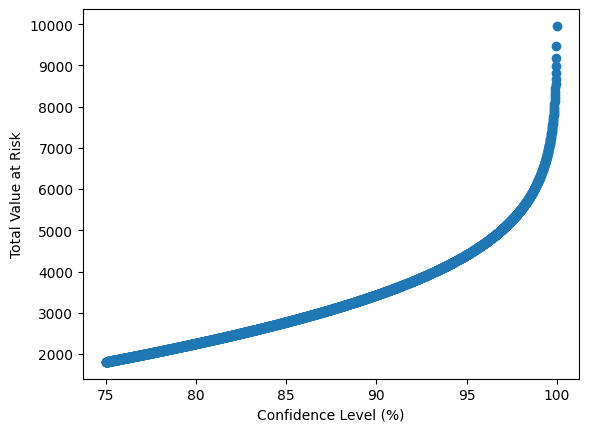

Minimum Value on Y-axis: 1806.418648884725
Maximum Value on Y-axis: 9960.27105361258


In [13]:

import pandas_datareader as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt

# Create our portfolio of equities
tickers = ['VETO.NS','VGUARD.NS','VIDHIING.NS']

# Set the no of shares bought of each stock (I arbitrarily picked for example)
stocks = np.array([250,100,150])

# Download closing prices
df=pd.DataFrame()
for i in tickers:
  tick=yf.Ticker(i)
  old  = tick.history(start="2017-01-01",  end=dt.now())['Close']
  new=pd.DataFrame(old)
  df[i]=new

#Calculate the initial invested value(Assuming we invested our money today)
initial_investment=stocks*df.iloc[-1,:]

#Calculate returns
returns=df.pct_change()

#Extract the correlation matrix
corr_matrix = returns.corr()

#Get the standard deviation of returns
st_dev=returns.std()

#Declare the confidence and Total Value-at-Risk variables
conf=[]
tot_vaRlist=[]

#Run the simulation for calculating VaR for different confidence intervals and
#get the list of Total VaR for all values(We took confidence intervals ranging from 75 to 100 with a step of .01)
for i in range(0,2500):
  conf+=[75+i/100]
  vaR=st.norm.ppf(conf[i]/100)*st_dev*initial_investment*-1
  vaRlist=np.array(vaR)
  tot_vaR_sq=np.matmul( np.matmul(vaRlist,corr_matrix.to_numpy()) , np.transpose(vaRlist))
  tot_vaR=np.sqrt(tot_vaR_sq)
  tot_vaRlist+=[tot_vaR]
#Plot the VaR against the different confidence intervals
plt.scatter(conf, tot_vaRlist)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Total Value at Risk")
plt.show()
min_y = min(tot_vaRlist)
max_y = max(tot_vaRlist)

print("Minimum Value on Y-axis:", min_y)
print("Maximum Value on Y-axis:", max_y)


